In [1]:
import numpy as np

import sys
sys.path.insert(0,'../debvader')
from debvader import load_deblender, deblend, deblend_field

In [2]:
nb_of_bands = 6
input_shape = (59, 59, nb_of_bands)
hidden_dim = 256
latent_dim = 32
filters = [32,64,128,256]
kernels = [3,3,3,3]

In [3]:
net = load_deblender("dc2", input_shape, latent_dim, filters, kernels)

W1119 23:46:48.076968 140055103203136 deprecation.py:506] From /sps/lsst/users/barcelin/miniconda/envs/python_cpu6/lib/python3.6/site-packages/tensorflow_core/python/ops/linalg/linear_operator_lower_triangular.py:158: calling LinearOperator.__init__ (from tensorflow.python.ops.linalg.linear_operator) with graph_parents is deprecated and will be removed in a future version.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


in cropping
/pbs/throng/lsst/users/barcelin/debvader/debvader/../data/weights/dc2/not_normalised/loss/


In [4]:
root_dir = "/pbs/home/b/barcelin/sps_link/data/dc2_test/24.5/test/"
images = np.load(root_dir+'img_cropped_sample_2.npy', mmap_mode = 'c')
images_noiseless = np.load(root_dir+'img_noiseless_sample_2.npy', mmap_mode = 'c')

In [5]:
images.shape

(10000, 59, 59, 6)

In [6]:
test_images = images[0:100]
test_images_noiseless = images_noiseless[0:100]

In [7]:
output, output_distrib = deblend(net, test_images)

In [8]:
np.max(test_images[0])

2.2348599433898926

In [9]:
np.max(output[0])

2.4988904

In [10]:
import matplotlib.pyplot as plt

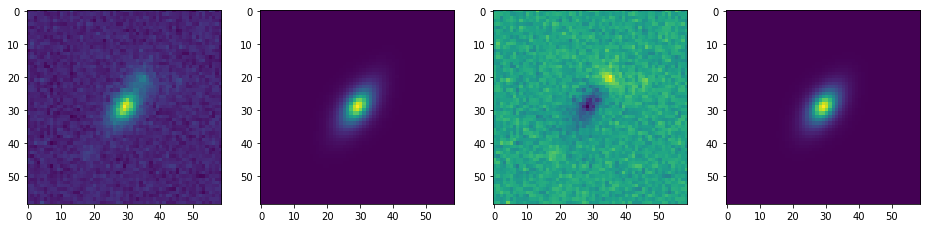

In [11]:
fig, axes = plt.subplots(1,4, figsize =(16,4))

axes[0].imshow(test_images[0,:,:,2])
axes[1].imshow(output[0,:,:,2])
axes[2].imshow(test_images[0,:,:,2]- output[0,:,:,2])
axes[3].imshow(test_images_noiseless[0,:,:,2])

In [12]:
import scipy

In [13]:
def diff_deblender(img, deblended_img,nx,ny):
    return img-np.roll(deblended_img,(nx,ny),axis = (0,1))

In [14]:
out = diff_deblender(test_images[0],output[0],0,0)

In [15]:
out.shape

(59, 59, 6)

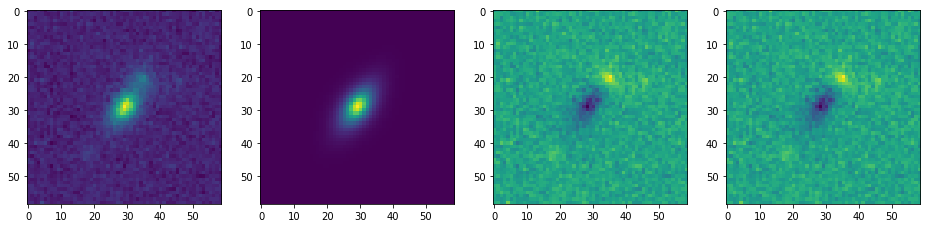

In [16]:
fig, axes = plt.subplots(1,4, figsize =(16,4))

axes[0].imshow(test_images[0,:,:,2])
axes[1].imshow(output[0,:,:,2])
axes[2].imshow(test_images[0,:,:,2]- output[0,:,:,2])
axes[3].imshow(out[:,:,2])

In [17]:
from scipy import optimize
import skimage

-0.8722426891326904 -0.582432746887207


NameError: name 'fun' is not defined

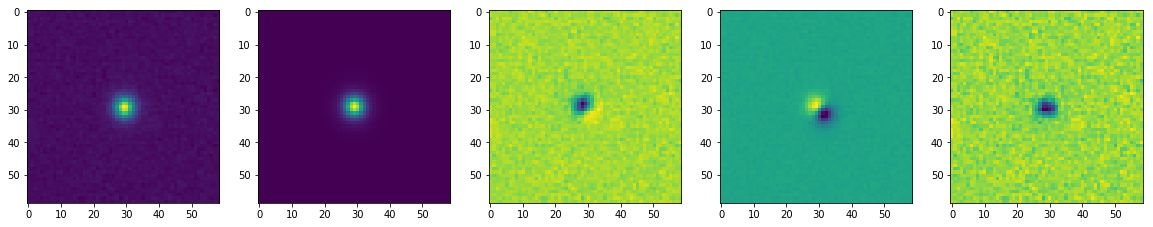

In [18]:
fig, axes = plt.subplots(1,5, figsize= (20,4))

axes[0].imshow(test_images[7,:,:,2])
axes[1].imshow(output[7,:,:,2])
axes[2].imshow(test_images[7,:,:,2]-output[7,:,:,2])
axes[3].imshow(test_images[7,:,:,2]-np.roll(output[7,:,:,2],shift = 2,axis = (0,1)))

axes[4].imshow(test_images[7,:,:,2]-scipy.ndimage.shift(output[7,:,:,2],shift = (0.3,0.3)))


print(np.min(test_images[7,:,:,2]-output[7,:,:,2]), np.min(test_images[7,:,:,2]-scipy.ndimage.shift(output[7,:,:,2],shift = (0.3,0.3))))
print(optimize.least_squares(fun,(0.,0.), args=(test_images[7,:,:,2],output[7,:,:,2]), bounds=(-2,2)).x)

In [ ]:
def fun (x, test_img, output): 
    return 1/skimage.measure.compare_ssim(test_img,scipy.ndimage.shift(output,shift = (x[0],x[1])))

In [ ]:
bnds = ((-2, 2), (-2, 2))

list_x = []

for i in range (50):
    opt = optimize.least_squares(fun,(0.,0.), args=(test_images[i,:,:,2],output[i,:,:,2]), bounds=(-2,2))
    #print(opt.x)
    list_x.append(opt.x)

In [ ]:
opt

In [ ]:
fig, axes = plt.subplots(50,4, figsize= (16,200))

for i in range (50):
    axes[i,0].imshow(test_images[i,:,:,2])
    axes[i,1].imshow(output[i,:,:,2])
    axes[i,2].imshow(test_images[i,:,:,2]-output[i,:,:,2])
    axes[i,3].imshow(test_images[i,:,:,2]-scipy.ndimage.shift(output[i,:,:,2],shift = list_x[i]))


print(np.min(test_images[7,:,:,2]-output[7,:,:,2]), np.min(test_images[7,:,:,2]-scipy.ndimage.shift(output[7,:,:,2],shift = list_x[7])))

In [ ]:
fig, axes = plt.subplots(1,4, figsize =(16,4))

axes[0].imshow(test_images[0,:,:,2])
axes[1].imshow(output[0,:,:,2])
axes[2].imshow(test_images[0,:,:,2]- np.roll(output[0,:,:,2],(0,0),axis = (0,1)))
axes[3].imshow(out[:,:,2])